# Explore IGRA soundings database 

### Raw .nc (open in xarray)

In [233]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('~/Box/IGRA_soundings_data/INDIA/INM00043371_THIRUVANANTHAPURAM.nc')

In [89]:
ds.assign_coords(time=ds.time.astype('int').astype('str'))
ds

<xarray.Dataset>
Dimensions:  (time: 57061, var: 7, lev: 290)
Coordinates:
  * time     (time) float64 1.928e+09 1.928e+09 ... 2.019e+09 2.019e+09
  * var      (var) int32 0 1 2 3 4 5 6
Dimensions without coordinates: lev
Data variables:
    data     (time, lev, var) float32 nan 60.0 nan nan nan ... nan nan nan nan

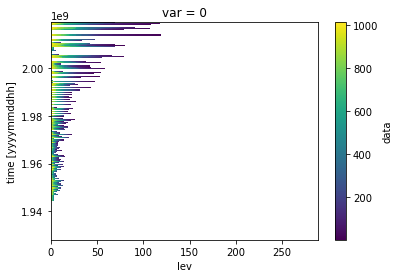

In [91]:
ds.data[:,:,0].plot() # 0 = pressure

# Data interpolated to 25mb levels

In [256]:
file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043003_BOMBAY.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043063_PUNE.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043311_AMINDIVI_WofKerala.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043371_THIRUVANANTHAPURAM.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.KEM00063741_DAGORETTI_CORNER.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.SEM00063985_SEYCHELLES.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043285_MANGALORE.nc'
#file='/Users/brianmapes/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043295_BANGALORE.nc'

sta = file[94:]
sta

'BOMBAY.nc'

In [257]:
ds25 = xr.open_dataset(file)
#ds25

Text(0.5, 1.0, 'BOMBAY.nc')

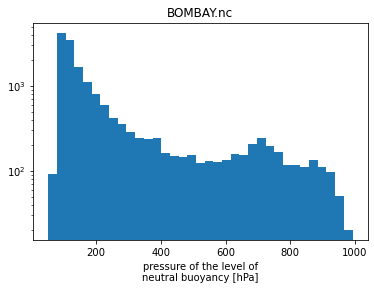

In [258]:
ds25.LNBPress.plot.hist(bins=35, log=True)
plt.title(sta)

In [259]:
# Create year, month, day, hour time lists for subsetting
# Get the date as a string from an integer, not a float number
date = ds25.time.values.astype('int').astype('str')

# print(date[0]) # 1947060715

# Extract characters: Brackets create a list of one element from date[0]
yyyy = [date[0][0:4]]
mm = [date[0][4:6]]
dd = [date[0][6:8]]
hh = [date[0][8:10]]

# Lists are appended for all the other elements of date array 
for i in range(len(date)-1): 
    yyyy.append(date[i+1][0:4])
    mm.append(date[i+1][4:6])
    dd.append(date[i+1][6:8])
    hh.append(date[i+1][8:10])
    
# hh  # a list of strings 

In [260]:
ds25.assign_coords( yyyy = ("time", yyyy) )
ds25.assign_coords(mm = ("time", mm) )
#ds25.assign_coords(dd = ("time", dd) )
#ds25.assign_coords(hh = ("time", hh) )


<xarray.Dataset>
Dimensions:       (time: 31174, lev: 42, var: 19)
Coordinates:
  * time          (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
    mm            (time) <U2 '01' '02' '02' '02' '03' ... '08' '08' '08' '08'
Data variables: (12/25)
    Data          (time, lev, var) float32 ...
    InterpLevNum  (time) float64 ...
    variables     (var) object ...
    units         (var) object ...
    release_time  (time) float64 ...
    PW            (time) float32 ...
    ...            ...
    LI            (time) float32 ...
    SI            (time) float32 ...
    KI            (time) float32 ...
    TTI           (time) float32 ...
    CAPE          (time) float32 ...
    CIN           (time) float32 ...

In [261]:
ds25.assign(dd = ("time", dd) )
ds25.assign(hh = ("time", hh) )
ds25.assign(yyyy = ("time", yyyy) )
ds25.assign(mm = ("time", mm) )

<xarray.Dataset>
Dimensions:       (time: 31174, lev: 42, var: 19)
Coordinates:
  * time          (time) float64 1.955e+09 1.955e+09 ... 2.019e+09 2.019e+09
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables: (12/26)
    Data          (time, lev, var) float32 ...
    InterpLevNum  (time) float64 ...
    variables     (var) object ...
    units         (var) object ...
    release_time  (time) float64 ...
    PW            (time) float32 ...
    ...            ...
    SI            (time) float32 ...
    KI            (time) float32 ...
    TTI           (time) float32 ...
    CAPE          (time) float32 ...
    CIN           (time) float32 ...
    mm            (time) <U2 '01' '02' '02' '02' '03' ... '08' '08' '08' '08'

In [262]:
ds25.Data.mean(dim='time')

<xarray.DataArray 'Data' (lev: 42, var: 19)>
array([[ 1.00000000e+03,  7.20115128e+01,  7.00015717e+01,
         2.99710754e+02, -3.47967458e+00,  2.99710541e+02,
         5.97503710e+00,  3.02423767e+02,  3.02448669e+02,
         2.42478809e+03,  3.55061450e+03,  7.46640396e+01,
         6.88691330e+01, -2.11040859e+01,  1.55003250e+00,
         5.98979175e-01, -1.39220929e+00,  2.85147876e-01,
         3.59461937e+01],
       [ 9.75447998e+02,  3.22948822e+02,  2.91970154e+02,
         2.98948792e+02, -4.58841991e+00,  3.01135498e+02,
         5.19444752e+00,  3.01465790e+02,  3.03724121e+02,
         2.20812329e+03,  3.38901562e+03,  6.95800629e+01,
         6.58662033e+01, -1.77005501e+01,  1.83488297e+00,
         5.52690864e-01, -1.11337006e+00,  6.32017970e-01,
         3.45093575e+01],
       [ 9.50000000e+02,  5.39107117e+02,  5.20574402e+02,
         2.97913605e+02, -5.12695503e+00,  3.02335785e+02,
         4.68330574e+00,  3.00185638e+02,  3.04701355e+02,
         1.96414722e+03,  3.19217578e+03,  6.59853745e+01,
         6.25159569e+01, -1.41792173e+01,  2.03336000e+00,
         2.68377781e-01, -9.97978568e-01,  7.90453136e-01,
...
         2.18160934e+02,  2.41329980e+00,  5.96431641e+02,
         3.42466240e+01,  2.23512268e+02,  6.36355469e+02,
         2.53309965e+00,  4.44322634e+00,  4.76179868e-01,
         2.10353546e+01, -1.24107301e+00, -8.55066681e+00,
        -4.74083573e-01, -4.60536838e-01,  5.71216457e-02,
         1.11735034e+00],
       [ 2.00000000e+01,  2.64576406e+04,  2.65389355e+04,
         2.22659119e+02,  2.02944660e+00,  6.84004211e+02,
         3.74209366e+01,  2.20133636e+02,  7.51360718e+02,
         2.87097502e+00,  6.91707373e+00,  1.98287159e-01,
         2.14668674e+01, -2.17741206e-01, -1.02373438e+01,
        -2.56520301e-01, -3.59647602e-01, -7.20568895e-02,
         7.50924110e-01],
       [ 1.00000000e+01,  3.10174434e+04,  3.10610176e+04,
         2.30319443e+02,  1.78694415e+00,  8.61395569e+02,
         4.42450752e+01,  2.12283890e+02,  8.60589966e+02,
         2.66456366e+00,  1.57882223e+01,  1.80237994e-01,
         3.77072639e+01, -6.03885353e-01, -1.23128891e+01,
        -6.71077073e-02, -6.57440126e-01,  2.91295469e-01,
         3.91160756e-01]], dtype=float32)
Coordinates:
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
  * var      (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

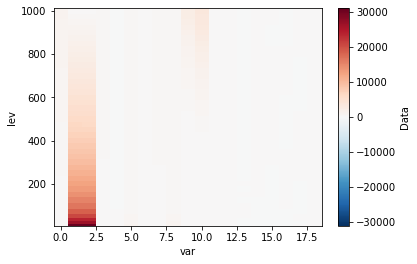

In [263]:
ds25.Data.mean(dim='time')[:,:].plot()

(array([   18.,    86.,   958.,  5105., 10931.,  9001.,  3226.,   639.,
           90.,    12.]),
 array([397. , 431.6, 466.2, 500.8, 535.4, 570. , 604.6, 639.2, 673.8,
        708.4, 743. ], dtype=float32),
 <BarContainer object of 10 artists>)

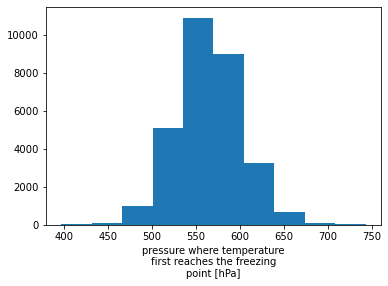

In [264]:
ds25.FrzPress.plot.hist()

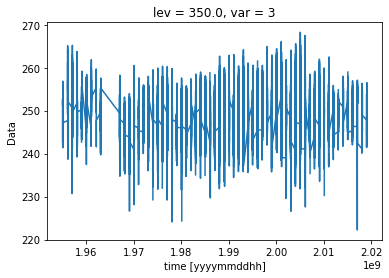

In [265]:
ds25.Data[:,26,3].plot() ## 3 is reported pressure, 25 is 350 hPa 
#title('surprising cold winters for 9N')

(array([5.0000e+00, 1.1000e+01, 4.4000e+01, 4.0700e+02, 3.4320e+03,
        9.8730e+03, 1.0653e+04, 3.3710e+03, 3.6800e+02, 2.7000e+01]),
 array([222.23544, 226.8369 , 231.43835, 236.03981, 240.64127, 245.24272,
        249.84418, 254.44563, 259.0471 , 263.64856, 268.25   ],
       dtype=float32),
 <BarContainer object of 10 artists>)

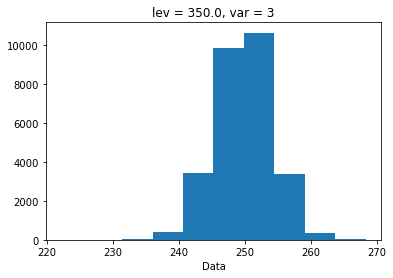

In [266]:
ds25.Data[:,26,3].plot.hist()

(array([7.000e+00, 4.500e+01, 4.190e+02, 1.670e+03, 4.889e+03, 6.801e+03,
        3.236e+03, 3.570e+02, 2.900e+01, 5.000e+00]),
 array([ 1.51    , 10.297   , 19.084   , 27.870998, 36.657997, 45.445   ,
        54.232   , 63.018997, 71.806   , 80.592995, 89.38    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

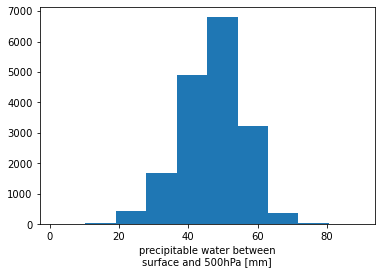

In [83]:
ds25.PW.plot.hist()

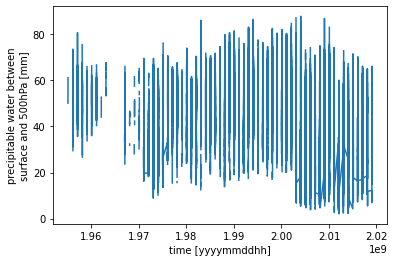

In [267]:
ds25.PW.plot()

# WHY can I only assign ONE new variable? 
Example from https://xarray.pydata.org/en/stable/generated/xarray.Dataset.assign.html

In [180]:
x = xr.Dataset(
    {
        "temperature_c": (
            ("lat", "lon"),
            20 * np.random.rand(4).reshape(2, 2),
        ),
        "precipitation": (("lat", "lon"), np.random.rand(4).reshape(2, 2)),
    },
    coords={"lat": [10, 20], "lon": [150, 160]},
)
x

<xarray.Dataset>
Dimensions:        (lat: 2, lon: 2)
Coordinates:
  * lat            (lat) int64 10 20
  * lon            (lon) int64 150 160
Data variables:
    temperature_c  (lat, lon) float64 13.17 8.287 5.357 2.772
    precipitation  (lat, lon) float64 0.9112 0.6588 0.9365 0.2

In [184]:
x.assign(temperature_f=x["temperature_c"] * 9 / 5 + 32)

<xarray.Dataset>
Dimensions:        (lat: 2, lon: 2)
Coordinates:
  * lat            (lat) int64 10 20
  * lon            (lon) int64 150 160
Data variables:
    temperature_c  (lat, lon) float64 13.17 8.287 5.357 2.772
    precipitation  (lat, lon) float64 0.9112 0.6588 0.9365 0.2
    temperature_f  (lat, lon) float64 55.7 46.92 41.64 36.99

In [185]:
x.assign(temperature_f2=x["temperature_c"] * 9 / 5 + 32 +1000)

<xarray.Dataset>
Dimensions:         (lat: 2, lon: 2)
Coordinates:
  * lat             (lat) int64 10 20
  * lon             (lon) int64 150 160
Data variables:
    temperature_c   (lat, lon) float64 13.17 8.287 5.357 2.772
    precipitation   (lat, lon) float64 0.9112 0.6588 0.9365 0.2
    temperature_f2  (lat, lon) float64 1.056e+03 1.047e+03 1.042e+03 1.037e+03